In [19]:
import pandas as pd
import os
import numpy as np
import numpy.random
import matplotlib.pyplot as plt
os.chdir('/Users/sob/Desktop')

In [26]:
kts_dataframe = pd.read_json('kts.json')

In [40]:
y = list(kts_dataframe['kt_pred'])
x = list(kts_dataframe['kt_true'])

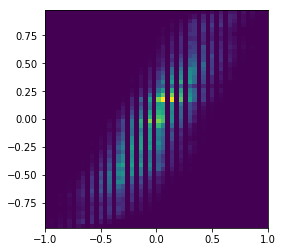

In [55]:
### Generate some test data
heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

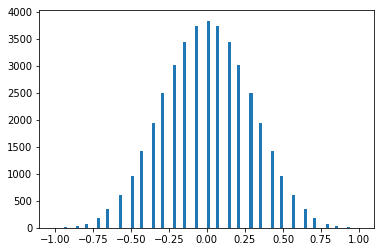

In [54]:
%matplotlib inline
plt.hist(kts_dataframe['kt_true'], bins=100)
plt.show()

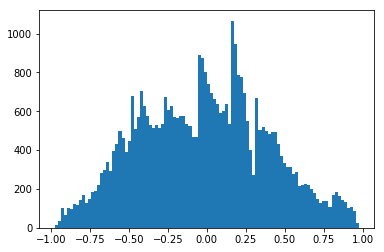

In [56]:
plt.hist(kts_dataframe['kt_pred'], bins = 100)
plt.show()

In [111]:
import numpy as np
import random


def max_perm_dist(size):
    """Maximum KT distance for sequence of given size.
    """
    return int(size * (size-1) / 2)


def random_perm_at_dist(size, dist):
    """Generate a random permutation at a given swap distance.
    """
    perm = list(range(size))

    # Left indexes of correctly-ordered pairs.
    ordered = set(range(size-1))

    for _ in range(dist):

        i1 = random.sample(ordered, 1)[0]
        i2 = i1 + 1

        perm[i1], perm[i2] = perm[i2], perm[i1]

        ordered.remove(i1)

        if i2+1 < len(perm) and perm[i2] < perm[i2+1]:
            ordered.add(i2)

        if i1 > 0 and perm[i1-1] < perm[i1]:
            ordered.add(i1-1)

    return perm


def sample_uniform_perms(size, maxn=10):
    """Sample N perms, uniformly distributed across the (-1, 1) KT interval.
    """
    max_dist = max_perm_dist(size)

    # At most, 1 sample for each possible distance.
    n = min(maxn, max_dist+1)

#     dists = np.linspace(0, max_dist, n, dtype=int)
    dists = np.random.random(size)*max_dist
    dists = dists.round().astype(int)
    
    perms = [
        random_perm_at_dist(size, int(d))
        for d in dists
    ]

    kts = dists / float(max_dist)

    return perms, kts

In [131]:
perms, kts = sample_uniform_perms(10)
print perms
print kts

hello
